<a href="https://colab.research.google.com/github/thaituongan/PROJECT-DATA-MINING/blob/main/%5BProject_DM%5D_%C4%90%E1%BB%81_T%C3%A0i_Ph%C3%A2n_Lo%E1%BA%A1i_Nguy_C%C6%A1_Ch%C3%A1y_R%E1%BB%ABng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT THƯ VIỆN**

In [1]:
!pip uninstall sdv -y
!pip install sdv[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.0/155.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sdv.single_table.ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

# **LOAD DATASET**

In [3]:
# Tải dữ liệu
url = 'https://raw.githubusercontent.com/thaituongan/PROJECT-DATA-MINING/refs/heads/main/Algerian_forest_fires_dataset_UPDATE.csv'
df = pd.read_csv(url)
# hiển thi thông tin của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


# **TIỀN XỬ LÍ DỮ LIỆU**

In [5]:
# Loại bỏ các cột ngày, tháng, và năm
df = df.drop(columns=['day', 'month', 'year'])
# Kiểm tra dữ liệu sau khi loại bỏ
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [6]:
# Lọc các dòng chứa giá trị bị thiếu
missing_data = df[df.isnull().any(axis=1)]
missing_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
# loại bỏ giá trị thiếu
df = df.dropna()
df.isnull().sum()

,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0
ISI,0
BUI,0
FWI,0


In [8]:
df.columns = df.columns.str.strip()  # Loại bỏ khoảng trắng thừa
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [9]:
# loại bỏ khoảng trắng thừa trong dữ liệu:
df['Classes'] = df['Classes'].str.strip()
# Kiểm tra lại các giá trị duy nhất trong cột Classes
print(df['Classes'].unique())
# Hiển thị số lượng mẫu theo lớp
print(df['Classes'].value_counts())

['not fire' 'fire']
Classes
fire        137
not fire    106
Name: count, dtype: int64


**BIỂU DIỄN DỮ LIỆU**

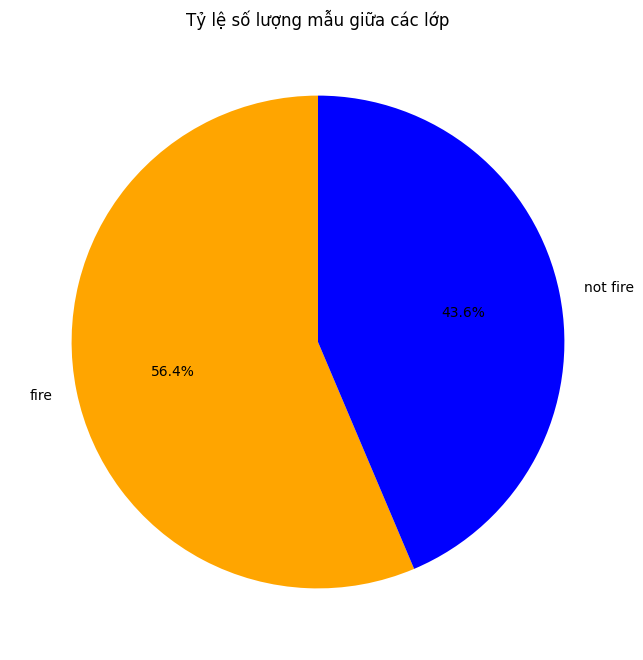

In [10]:
# Biểu đồ tỷ lệ các lớp (fire và not fire)
class_counts = df['Classes'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['orange', 'blue'], startangle=90)
plt.title('Tỷ lệ số lượng mẫu giữa các lớp')
plt.show()

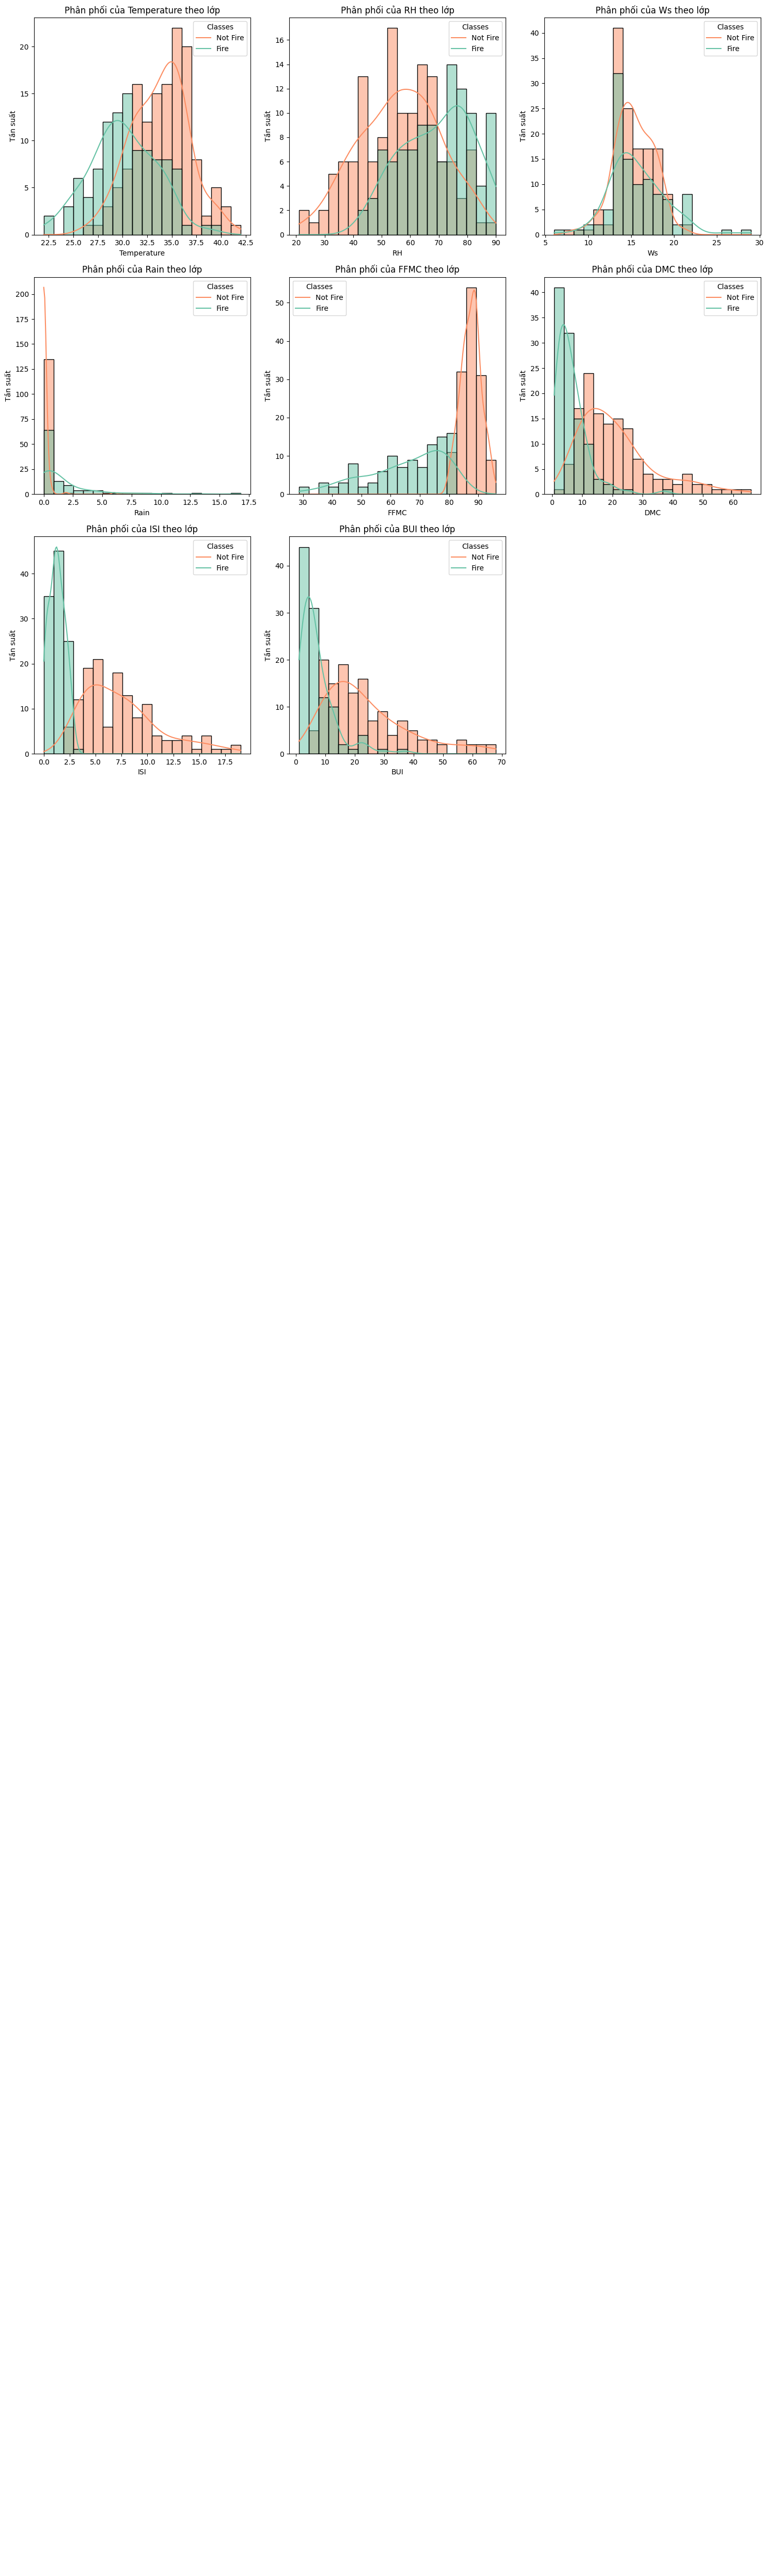

In [ ]:
# Danh sách các cột đặc trưng
cols_to_plot = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']

# Tạo lưới để hiển thị biểu đồ phân phối rõ ràng
n_cols = 3  # Số cột trong lưới
n_rows = (len(cols_to_plot) + n_cols - 1)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, col in enumerate(cols_to_plot):
    row, col_idx = divmod(i, n_cols)
    sns.histplot(data=df, x=col, hue='Classes', kde=True, bins=20, palette="Set2", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Phân phối của {col} theo lớp')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Tần suất')
    axes[row, col_idx].legend(title='Classes', labels=['Not Fire', 'Fire'])

# Ẩn các ô thừa nếu số lượng biểu đồ không chia hết cho số cột
for j in range(i + 1, n_rows * n_cols):
    row, col_idx = divmod(j, n_cols)
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.show()

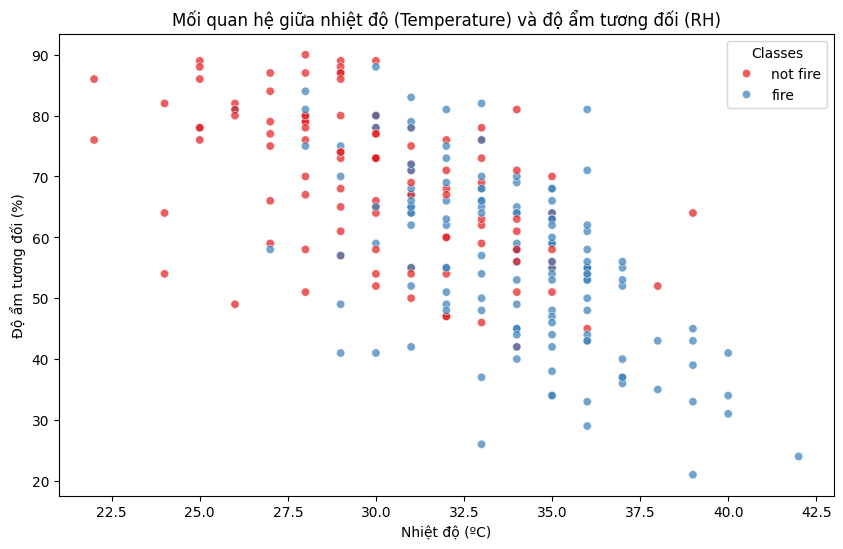

In [ ]:
# Nhiệt độ (Temperature) và độ ẩm tương đối (RH)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='RH', hue='Classes', palette="Set1", alpha=0.7)
plt.title('Mối quan hệ giữa nhiệt độ (Temperature) và độ ẩm tương đối (RH)')
plt.xlabel('Nhiệt độ (ºC)')
plt.ylabel('Độ ẩm tương đối (%)')
plt.legend(title='Classes')
plt.show()

**MÃ HÓA BIẾN PHÂN LOẠI**

In [11]:
# Mã hóa nhãn: "not fire" -> 0, "fire" -> 1
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [13]:
# Chuyển đổi dữ liệu sang kiểu số
cols_to_convert = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

**Kiểm tra giá trị ngoại lai (Outliers):**

In [14]:
for col in ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# **Tăng Cường Dữ Liệu (Data Augmentation)**

In [15]:
# Áp dụng data augmenttaion cho các cột số
cols_to_augment = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

Dùng **Gaussian Noise**
Thêm nhiễu Gaussian vào các đặc trưng số, tạo ra dữ liệu tương tự nhưng có biến thể nhỏn giúp tăng cường mẫu từ dữ liệu gốc bằng cách tạo ra những giá trị gần với dữ liệu thật.

In [16]:
# hàm thêm nhiễu
def add_gaussian_noise(data, mean=0, std=0.02):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# Tăng cường dữ liệu bằng Gaussian Noise
def augment_gaussian_noise(df, cols_to_augment):
    df_noisy = df.copy()
    df_noisy[cols_to_augment] = add_gaussian_noise(df[cols_to_augment])
    return df_noisy

df_noisy = augment_gaussian_noise(df, cols_to_augment)

**Scaling**


In [17]:
# Điều chỉnh các đặc trưng bằng cách nhân hoặc chia giá trị với một hệ số ngẫu nhiên nhỏ.
# Hàm Scaling và Perturbation
def scale_features(data, scale_range=(0.88, 1.11)):
    scale_factors = np.random.uniform(scale_range[0], scale_range[1], data.shape)
    return data * scale_factors

def augment_scaling(df, cols_to_augment):
    df_scaled = df.copy()
    df_scaled[cols_to_augment] = scale_features(df_noisy[cols_to_augment])
    return df_scaled

# Áp dụng Scaling cho các cột số
df_scaled = augment_scaling(df, cols_to_augment)

In [18]:
# Kết hợp tất cả các tập augmented với dữ liệu gốc
df_combined = pd.concat([df, df_noisy, df_scaled], axis=0).reset_index(drop=True)

In [19]:
# Bỏ dữ liệu trùng lặp và đếm giá trị data sau khi được tăng cường
df_combined = df_combined.drop_duplicates()
df_combined['Classes'].value_counts()

,count
Classes,
1,327
0,138


# **Sử dụng mô hình CTGAN để tăng cường và cân bằng dữ liệu**

Tăng cường dữ liệu bằng cách tạo ra dữ liệu nhân tạo sử dụng CTGAN (Conditional Tabular Generative Adversarial Network) cho từng lớp trong dữ liệu ban đầu (Classes).
Đảm bảo dữ liệu nhân tạo cân bằng và đại diện cho đặc điểm của từng lớp.

In [37]:
# Chỉ định cho CTGAN biết đâu là dữ liệu phân loại trong quá trình huấn luyện
discrete_columns = ['Classes']
# Chia dữ liệu theo từng lớp
df_class_0 = df_combined[df_combined['Classes'] == 0]
df_class_1 = df_combined[df_combined['Classes'] == 1]

# Khởi tạo và huấn luyện CTGAN cho từng lớp
ctgan_class_0 = CTGAN()
ctgan_class_0.fit(df_class_0)

ctgan_class_1 = CTGAN()
ctgan_class_1.fit(df_class_1)

# Tạo dữ liệu nhân tạo cho từng lớp
synthetic_data_class_0 = ctgan_class_0.sample(1000)
synthetic_data_class_1 = ctgan_class_1.sample(800)

# Kết hợp dữ liệu nhân tạo từ cả hai lớp
synthetic_data = pd.concat([synthetic_data_class_0, synthetic_data_class_1]).reset_index(drop=True)

# Hiển thị thông tin dữ liệu nhân tạo
print(f"Số lượng mẫu dữ liệu nhân tạo: {len(synthetic_data)}")
print(synthetic_data['Classes'].value_counts())

Số lượng mẫu dữ liệu nhân tạo: 1800
Classes
0    1000
1     800
Name: count, dtype: int64


In [38]:
# Kết hợp dữ liệu nhân tạo augmented GAN với dữ liệu gốc
data = pd.concat([df_combined, synthetic_data], axis=0).reset_index(drop=True)
data['Classes'].value_counts()

,count
Classes,
0,1138
1,1127


**BIỂU ĐỒ PHÂN PHỐI DỮ LIỆU SAU KHI TĂNG CƯỜNG SO VỚI DỮ LIỆU GỐC**

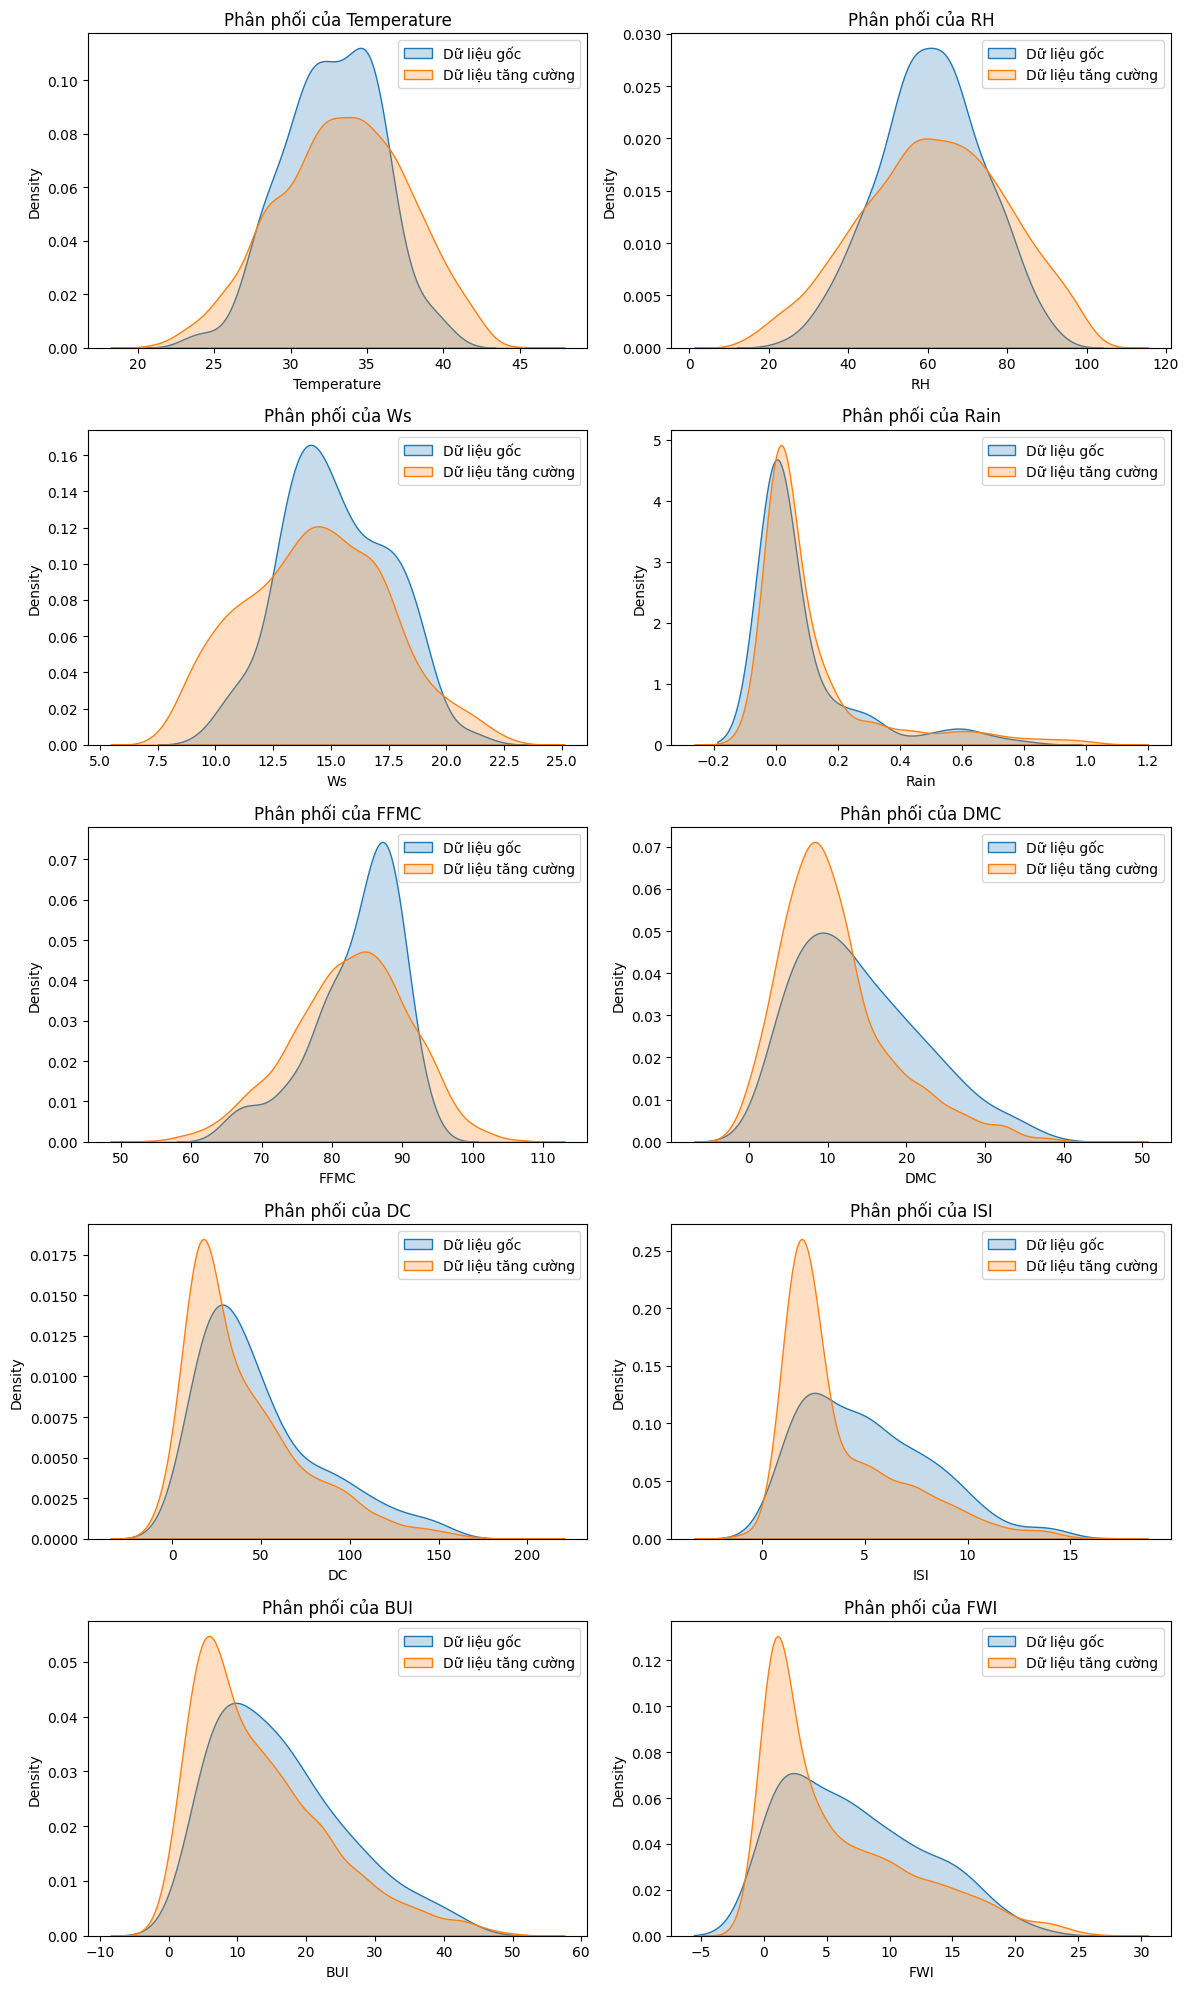

In [ ]:
# Danh sách các cột cần so sánh
cols_to_compare = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
# Tạo lưới biểu đồ
n_cols = 2  # Số lượng cột trong lưới
n_rows = (len(cols_to_compare) + 1) // n_cols  # Số lượng hàng, tính toán tự động
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # Kích thước lưới biểu đồ

# Lặp qua từng cột và vẽ biểu đồ KDE
for i, col in enumerate(cols_to_compare):
    row, col_idx = divmod(i, n_cols)  # Tính toán vị trí hàng và cột
    sns.kdeplot(df[col], label='Dữ liệu gốc', fill=True, ax=axes[row, col_idx])
    sns.kdeplot(data[col], label='Dữ liệu tăng cường', fill=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Phân phối của {col}")
    axes[row, col_idx].legend()

# Ẩn các ô trống (nếu có)
for j in range(i + 1, n_rows * n_cols):
    row, col_idx = divmod(j, n_cols)
    axes[row, col_idx].axis('off')

# Tăng khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

# **CHUẨN BỊ DỮ LIỆU**

**CHUẨN HÓA DỮ LIỆU**

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2265 non-null   float64
 1   RH           2265 non-null   float64
 2   Ws           2265 non-null   float64
 3   Rain         2265 non-null   float64
 4   FFMC         2265 non-null   float64
 5   DMC          2265 non-null   float64
 6   DC           2265 non-null   float64
 7   ISI          2265 non-null   float64
 8   BUI          2265 non-null   float64
 9   FWI          2265 non-null   float64
 10  Classes      2265 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 194.8 KB


In [40]:
data.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
2,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1
3,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
4,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1
5,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0
6,31.0,65.0,14.0,0.0,84.5,12.5,54.3,4.0,15.8,5.6,1
7,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1
8,31.0,55.0,16.0,0.1,79.9,4.5,16.0,2.5,5.3,1.4,0
9,30.0,78.0,14.0,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1


In [41]:
X = data.drop(columns=['Classes'])
y = data['Classes']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.34574301, 0.53003551, 0.68526734, ..., 0.06378006, 0.10945645,
        0.05723348],
       [0.26273568, 0.76030568, 0.56544745, ..., 0.05837931, 0.11815236,
        0.05723348],
       [0.42875035, 0.64517059, 0.44562755, ..., 0.16099353, 0.17206703,
        0.13323058],
       ...,
       [0.24875476, 0.78760495, 0.83875914, ..., 0.37163967, 0.51711215,
        0.28618661],
       [0.65309861, 0.26063194, 0.35747258, ..., 0.54416257, 0.44552822,
        0.63793827],
       [0.81969238, 0.27203903, 0.52484944, ..., 0.30141791, 0.3597033 ,
        0.56734532]])

**CHIA DỮ LIỆU THÀNH TẬP TRAIN VÀ TEST**

In [42]:
# Chia dữ liệu với tỷ lệ 70% Train, 30% Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [43]:
y_test.value_counts()

,count
Classes,
1,344
0,336


## **TRAIN MODEL**

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

def evaluate_model(model, X_train, y_train, X_test, y_test, class_labels=['Not Fire', 'Fire']):
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập Test
    y_pred = model.predict(X_test)

    # Báo cáo chi tiết
    report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)

    # Hiển thị báo cáo bằng PrettyTable
    table = PrettyTable()
    table.field_names = ["Metric", "Not Fire", "Fire", "Overall"]

    # Precision, Recall, F1-Score
    metrics = ["precision", "recall", "f1-score", "accuracy"]
    for metric in metrics:
        not_fire = report["Not Fire"].get(metric, "-")
        fire = report["Fire"].get(metric, "-")
        overall = report["accuracy"] if metric == "accuracy" else report["weighted avg"].get(metric, "-")
        table.add_row([metric.capitalize(), f"{not_fire:.4f}" if isinstance(not_fire, float) else "-",
                       f"{fire:.2f}" if isinstance(fire, float) else "-",
                       f"{overall:.2f}" if isinstance(overall, float) else "-"])

    print(table)

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Ma trận nhầm lẫn - {type(model).__name__}')
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.show()

 **Logistic Regression**

+-----------+----------+------+---------+
|   Metric  | Not Fire | Fire | Overall |
+-----------+----------+------+---------+
| Precision |  0.9471  | 0.96 |   0.95  |
|   Recall  |  0.9583  | 0.95 |   0.95  |
|  F1-score |  0.9527  | 0.95 |   0.95  |
|  Accuracy |    -     |  -   |   0.95  |
+-----------+----------+------+---------+


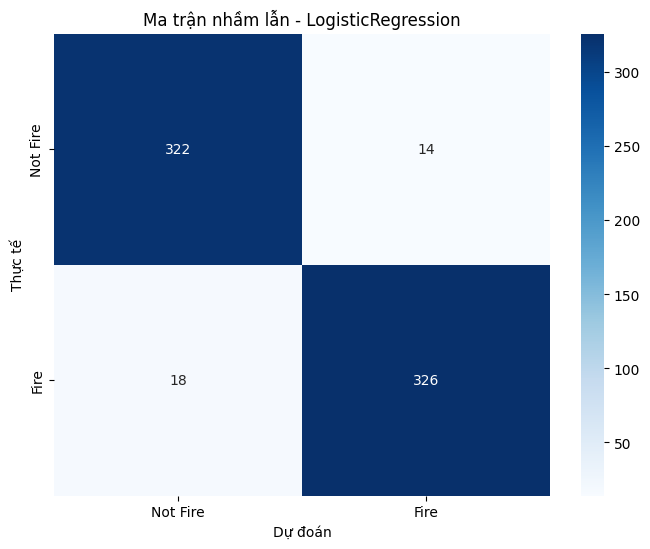

In [ ]:
log_reg = LogisticRegression(random_state=42)
evaluate_model(log_reg, X_train, y_train, X_test, y_test)

**Trích xuất trọng số của các đặc trưng từ mô hình mối thể hiện quan hệ giữa các đặc trưng và nhãn phân loại.**

In [47]:
feature_names=["Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
def extract_logistic_rules(model, feature_names):
    print("\nTrọng số của Logistic Regression:")
    for feature, coef in zip(feature_names, model.coef_[0]):
        print(f"{feature}: {coef:.4f}")
    print("\nIntercept (Hệ số tự do):", model.intercept_[0])
    print("Các đặc trưng có trọng số dương đóng vai trò quan trọng trong việc dự đoán 'Fire'.")

extract_logistic_rules(log_reg, feature_names)


Trọng số của Logistic Regression:
Temperature: 1.2012
RH: -0.3924
Ws: 1.7261
Rain: -3.0159
FFMC: 4.8565
DMC: 0.4777
DC: 3.0045
ISI: 5.9180
BUI: 4.5576
FWI: 6.0991

Intercept (Hệ số tự do): -7.186647421492414
Các đặc trưng có trọng số dương đóng vai trò quan trọng trong việc dự đoán 'Fire'.


**Random Forest**

+-----------+----------+------+---------+
|   Metric  | Not Fire | Fire | Overall |
+-----------+----------+------+---------+
| Precision |  0.9880  | 0.98 |   0.99  |
|   Recall  |  0.9821  | 0.99 |   0.99  |
|  F1-score |  0.9851  | 0.99 |   0.99  |
|  Accuracy |    -     |  -   |   0.99  |
+-----------+----------+------+---------+


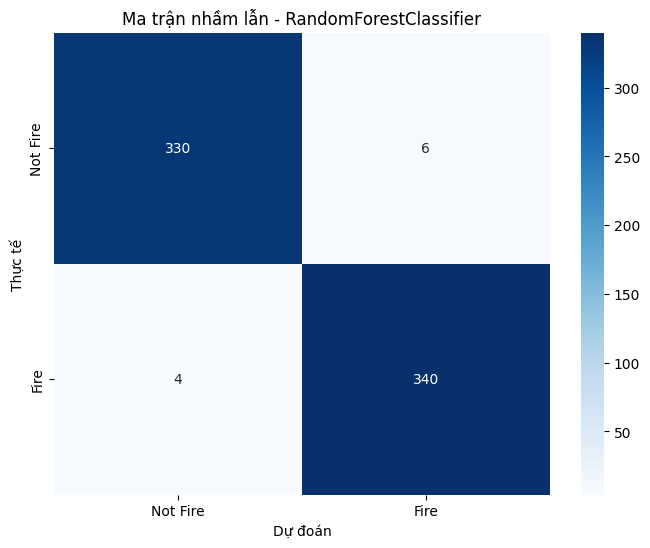

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

**Trích xuất và hiển thị các luật từ một số cây quyết định trong mô hình Random Forest.**

+-----------+----------+------+---------+
|   Metric  | Not Fire | Fire | Overall |
+-----------+----------+------+---------+
| Precision |  0.9941  | 1.00 |   1.00  |
|   Recall  |  0.9970  | 0.99 |   1.00  |
|  F1-score |  0.9955  | 1.00 |   1.00  |
|  Accuracy |    -     |  -   |   1.00  |
+-----------+----------+------+---------+


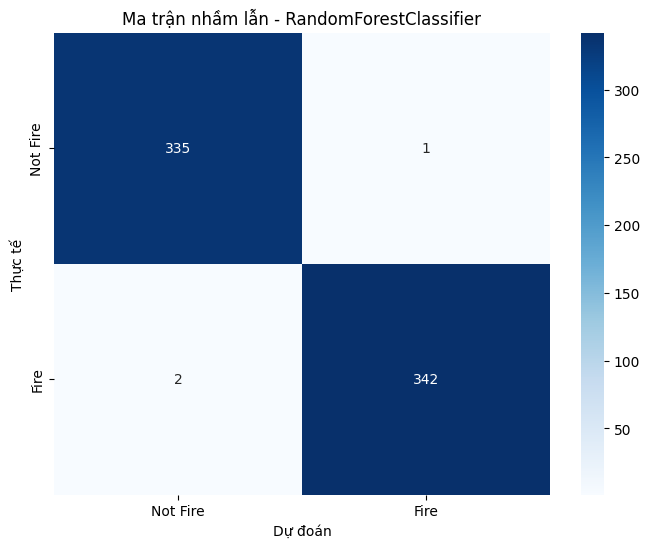


Luật từ cây số 1:
|--- ISI <= 0.16
|   |--- DC <= 0.28
|   |   |--- RH <= 0.18
|   |   |   |--- class: 1.0
|   |   |--- RH >  0.18
|   |   |   |--- FWI <= 0.35
|   |   |   |   |--- FWI <= 0.10
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- FWI >  0.10
|   |   |   |   |   |--- ISI <= 0.13
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- ISI >  0.13
|   |   |   |   |   |   |--- Temperature <= 0.49
|   |   |   |   |   |   |   |--- RH <= 0.52
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- RH >  0.52
|   |   |   |   |   |   |   |   |--- FFMC <= 0.35
|   |   |   |   |   |   |   |   |   |--- RH <= 0.73
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- RH >  0.73
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- FFMC >  0.35
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Temperature >  0.49
|   |   |   |   |   |

In [45]:
def generate_rules_from_random_forest(rf_model ,X_train, y_train, feature_names, n_trees=3):
    # Xuất luật từ một các cây
    for i, tree in enumerate(rf_model.estimators_[:n_trees]):
        print(f"\nLuật từ cây số {i + 1}:")
        rules = export_text(tree, feature_names=feature_names)
        print(rules)

    return rf_model

rf_model = generate_rules_from_random_forest(rf_model, X_train, y_train, feature_names=feature_names, n_trees=3)

**MLP**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


+-----------+----------+------+---------+
|   Metric  | Not Fire | Fire | Overall |
+-----------+----------+------+---------+
| Precision |  0.9668  | 0.95 |   0.96  |
|   Recall  |  0.9524  | 0.97 |   0.96  |
|  F1-score |  0.9595  | 0.96 |   0.96  |
|  Accuracy |    -     |  -   |   0.96  |
+-----------+----------+------+---------+


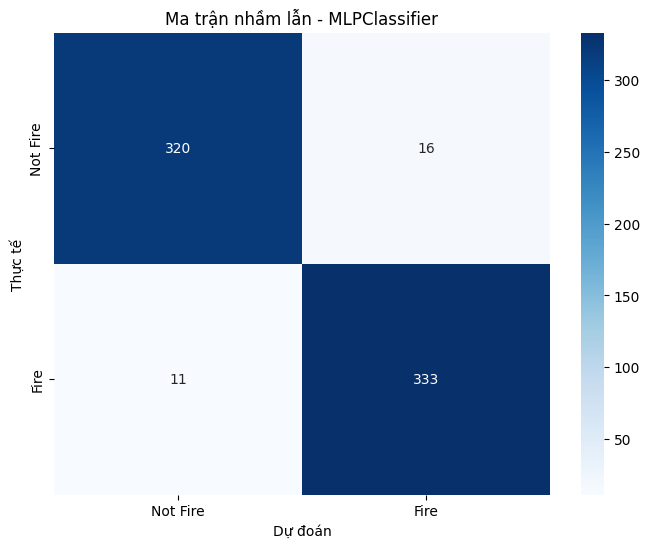

In [ ]:
mlp_model = MLPClassifier()
evaluate_model(mlp_model, X_train, y_train, X_test, y_test)

# **FINE TUNE MODEL**

**Fine tune cho logisticRegression**

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.9817034700315457
Độ chính xác trên tập Test: 0.99
              precision    recall  f1-score   support

    Not Fire       0.98      1.00      0.99       336
        Fire       1.00      0.98      0.99       344

    accuracy                           0.99       680
   macro avg       0.99      0.99      0.99       680
weighted avg       0.99      0.99      0.99       680



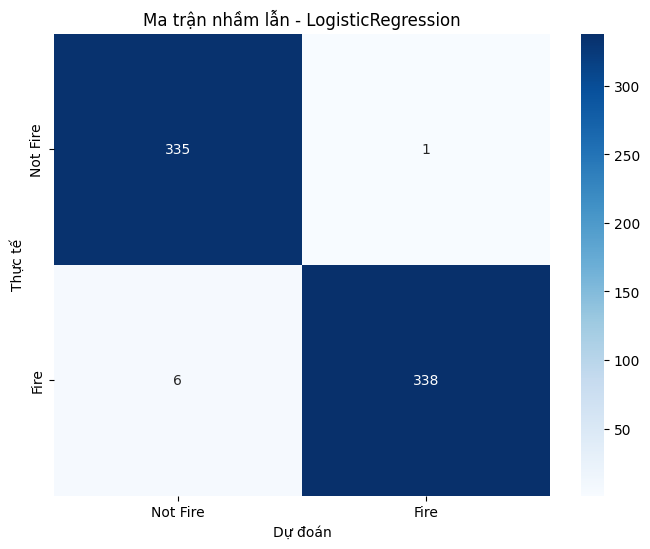

In [ ]:
# Định nghĩa tham số cần tìm kiếm
param_grid_log_reg = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 1, 10, 100],  # Độ phạt (regularization strength)
    'solver': ['liblinear', 'saga'],  # Trình tối ưu hóa
    'max_iter': [200, 500, 1000]  # Số lần lặp
}

# Khởi tạo mô hình Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Khởi tạo GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg,
                                   cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# Huấn luyện với GridSearchCV
grid_search_log_reg.fit(X_train, y_train)

# Kết quả tốt nhất
print(f"Best Parameters for Logistic Regression: {grid_search_log_reg.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_log_reg.best_score_}")

# Dự đoán trên tập Test
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)

# Đánh giá kết quả
evaluate_model(best_log_reg, X_train, y_train, X_test, y_test)

**Fine tune cho Random Forest**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9899053627760253
Độ chính xác trên tập Test: 0.99
              precision    recall  f1-score   support

    Not Fire       0.99      1.00      0.99       336
        Fire       1.00      0.99      0.99       344

    accuracy                           0.99       680
   macro avg       0.99      0.99      0.99       680
weighted avg       0.99      0.99      0.99       680



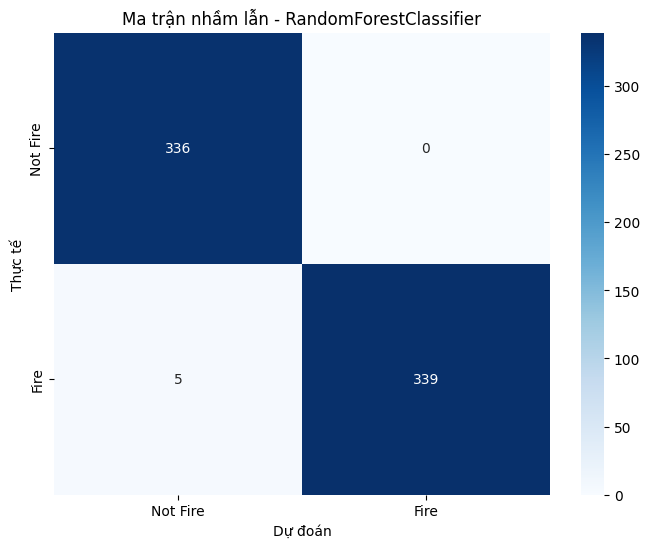

In [ ]:
# Định nghĩa tham số cần tìm kiếm
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Số cây trong rừng
    'max_depth': [10, 20, 30, None],  # Chiều sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để chia nhánh
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu trên một lá
    'bootstrap': [True, False]  # Sử dụng bootstrap hay không
}

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Khởi tạo GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Huấn luyện với GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Kết quả tốt nhất
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_rf.best_score_}")

# Dự đoán trên tập Test
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Đánh giá kết quả
evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)
